# IBM MODEL 

In [22]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_4693b242b04849ca8abc17ef2a28493b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2eC97Nb3cye1rKBSIaMgfU_7at6IXzg0ico4Rkrd4aWR',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_4693b242b04849ca8abc17ef2a28493b.get_object(Bucket='twinml-donotdelete-pr-0ndstg283vuyop',Key='Food_price_indices_data_jun.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Date,Food Price Index,Meat Price Index,Dairy Price Index,Cereals Price Index,Oils Price Index,Sugar Price Index
0,Jan-90,108.7,112.3,94.3,106.4,73.0,201.5
1,Feb-90,109.9,117.7,91.9,104.0,72.5,207.9
2,Mar-90,107.9,119.6,73.6,102.1,74.6,218.0
3,Apr-90,114.2,131.0,85.2,105.1,71.8,216.3
4,May-90,111.2,130.5,70.0,105.3,74.4,207.2


In [23]:
df_data_1["Average"]=(df_data_1["Food Price Index"]+df_data_1["Meat Price Index"]+df_data_1["Dairy Price Index"]+df_data_1["Cereals Price Index"]+df_data_1["Oils Price Index"]+df_data_1["Sugar Price Index"])/6
df_data_1.head()

,Date,Food Price Index,Meat Price Index,Dairy Price Index,Cereals Price Index,Oils Price Index,Sugar Price Index,Average
0,Jan-90,108.7,112.3,94.3,106.4,73.0,201.5,116.033333
1,Feb-90,109.9,117.7,91.9,104.0,72.5,207.9,117.316667
2,Mar-90,107.9,119.6,73.6,102.1,74.6,218.0,115.966667
3,Apr-90,114.2,131.0,85.2,105.1,71.8,216.3,120.600000
4,May-90,111.2,130.5,70.0,105.3,74.4,207.2,116.433333


In [25]:
df_data_1.isnull().sum()

Date                   10
Food Price Index       10
Meat Price Index       10
Dairy Price Index      10
Cereals Price Index    10
Oils Price Index       10
Sugar Price Index      10
Average                10
dtype: int64

In [26]:
df_data_1 = df_data_1[df_data_1['Average'].notna()]

In [27]:
df_data_1[['Month','Year']]= pd.DataFrame(df_data_1.Date.str.split('-',1).tolist(),
                                 columns = ['Month','Year'])
df_data_1.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Date,Food Price Index,Meat Price Index,Dairy Price Index,Cereals Price Index,Oils Price Index,Sugar Price Index,Average,Month,Year
0,Jan-90,108.7,112.3,94.3,106.4,73.0,201.5,116.033333,Jan,90
1,Feb-90,109.9,117.7,91.9,104.0,72.5,207.9,117.316667,Feb,90
2,Mar-90,107.9,119.6,73.6,102.1,74.6,218.0,115.966667,Mar,90
3,Apr-90,114.2,131.0,85.2,105.1,71.8,216.3,120.600000,Apr,90
4,May-90,111.2,130.5,70.0,105.3,74.4,207.2,116.433333,May,90


In [28]:
mon={'Jan':'01', 'Feb':'02', 'Mar':'03', 'Apr':'04','May':'05', 'Jun':'06', 'Jul':'07', 'Aug':'08','Sep':'09', 'Oct':'10', 'Nov':'11', 'Dec':'12' }
df_data_1.Month = df_data_1.Month.map(mon)
df_data_1.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Date,Food Price Index,Meat Price Index,Dairy Price Index,Cereals Price Index,Oils Price Index,Sugar Price Index,Average,Month,Year
0,Jan-90,108.7,112.3,94.3,106.4,73.0,201.5,116.033333,01,90
1,Feb-90,109.9,117.7,91.9,104.0,72.5,207.9,117.316667,02,90
2,Mar-90,107.9,119.6,73.6,102.1,74.6,218.0,115.966667,03,90
3,Apr-90,114.2,131.0,85.2,105.1,71.8,216.3,120.600000,04,90
4,May-90,111.2,130.5,70.0,105.3,74.4,207.2,116.433333,05,90


In [31]:

body = client_4693b242b04849ca8abc17ef2a28493b.get_object(Bucket='twinml-donotdelete-pr-0ndstg283vuyop',Key='Food_price_indices_data_jun - Copy.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()
df_data_2["Average"]=(df_data_2["Food Price Index"]+df_data_2["Meat Price Index"]+df_data_2["Dairy Price Index"]+df_data_2["Cereals Price Index"]+df_data_2["Oils Price Index"]+df_data_2["Sugar Price Index"])/6
del df_data_2['Unnamed: 7']


In [32]:
df_data_2.head()

,Date,Food Price Index,Meat Price Index,Dairy Price Index,Cereals Price Index,Oils Price Index,Sugar Price Index,DateMod,Average
0,Jan-90,108.7,112.3,94.3,106.4,73.0,201.5,199001,116.033333
1,Feb-90,109.9,117.7,91.9,104.0,72.5,207.9,199002,117.316667
2,Mar-90,107.9,119.6,73.6,102.1,74.6,218.0,199003,115.966667
3,Apr-90,114.2,131.0,85.2,105.1,71.8,216.3,199004,120.600000
4,May-90,111.2,130.5,70.0,105.3,74.4,207.2,199005,116.433333


Text(0, 0.5, 'AVERAGE PRICE INDEX')

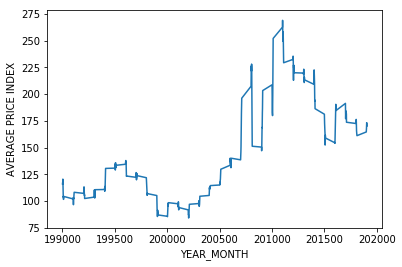

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(df_data_2.DateMod, df_data_2.Average)
plt.xlabel('YEAR_MONTH')
plt.ylabel('AVERAGE PRICE INDEX')

In [34]:
df_data_2.dtypes

Date                    object
Food Price Index       float64
Meat Price Index       float64
Dairy Price Index      float64
Cereals Price Index    float64
Oils Price Index       float64
Sugar Price Index      float64
DateMod                  int64
Average                float64
dtype: object

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_data_2[["DateMod"]],df_data_2[["Average"]],test_size=0.3)

In [36]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
reg.predict([[202001]])

array([[205.89266032]])

In [38]:
reg.predict(x_test)

array([[190.52765505],
       [202.0610847 ],
       [186.54126829],
       [ 89.82301089],
       [121.09486042],
       [194.70755573],
       [116.87625695],
       [ 97.83448719],
       [175.12394699],
       [198.19080629],
       [124.92643604],
       [186.92829613],
       [171.13756023],
       [194.39793345],
       [117.10847366],
       [136.57597405],
       [101.47254889],
       [132.35737058],
       [117.03106809],
       [175.0852442 ],
       [194.32052789],
       [159.87505006],
       [182.78709823],
       [144.27782808],
       [190.83727732],
       [113.39300639],
       [140.17533297],
       [120.74653536],
       [105.42023287],
       [144.23912529],
       [155.81125773],
       [171.21496579],
       [159.56542779],
       [109.25180849],
       [182.8645038 ],
       [190.56635783],
       [ 90.13263316],
       [144.31653086],
       [167.3059846 ],
       [171.17626301],
       [182.98061215],
       [128.60320053],
       [174.96913585],
       [ 90

In [39]:
reg.score(x_test,y_test)

0.5326735516110186

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df_data_2[["DateMod"]],df_data_2[["Average"]])
y_pred = model.predict(df_data_2[["DateMod"]])

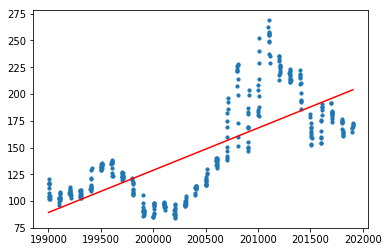

In [41]:
plt.scatter(df_data_2[["DateMod"]],df_data_2[["Average"]], s=10)
plt.plot(df_data_2[["DateMod"]], y_pred, color='r')
plt.show()

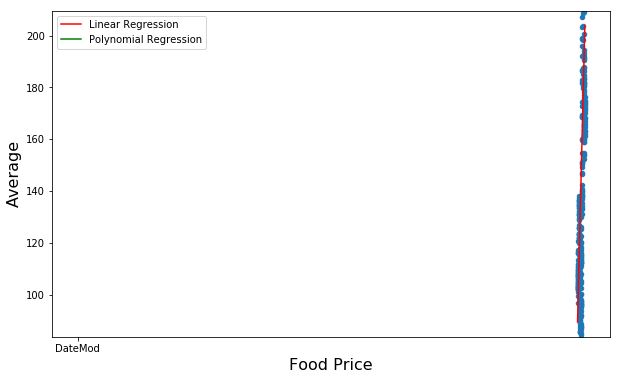

In [61]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=3)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(df_data_2[["DateMod"]],df_data_2[["Average"]])

poly_pred=pipe.predict(df_data_2[["DateMod"]])
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(df_data_2[["DateMod"]],poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(df_data_2[["DateMod"]],df_data_2[["Average"]],s=20)
plt.plot(df_data_2[["DateMod"]],y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Food Price',fontsize=16)
plt.ylabel('Average',fontsize=16)
plt.legend()
plt.show()

In [62]:
pipe.predict(x_test)

array([[195.01157019],
       [210.50337374],
       [189.85563922],
       [ 95.73872967],
       [119.69832986],
       [200.52730539],
       [116.1074254 ],
       [101.29209548],
       [175.6519909 ],
       [205.20947513],
       [123.05703608],
       [190.35174847],
       [170.88912416],
       [200.1148852 ],
       [116.30217339],
       [133.83837895],
       [103.94669314],
       [129.83508336],
       [116.23721965],
       [175.60526133],
       [200.01187636],
       [157.98087295],
       [185.09319526],
       [141.4378232 ],
       [195.41629709],
       [113.22695302],
       [137.34309597],
       [119.39758455],
       [106.92115809],
       [141.39869509],
       [153.52167229],
       [170.98064061],
       [157.63742492],
       [109.90173668],
       [185.19047835],
       [195.06212741],
       [ 95.94588871],
       [141.47696081],
       [166.40686553],
       [170.93487761],
       [185.33647494],
       [126.36715625],
       [175.46513008],
       [ 95

In [63]:
pipe.score(x_test,y_test)

0.5371154870863354

### SUPPOSE WE WANT TO KNOW THE FOOD PRICE INDEX OF 2020 JANUARY THEN WRITE 202001

In [64]:
pipe.predict([[202010]])

array([[216.32905533]])

In [65]:
df_data_2.describe()

,Food Price Index,Meat Price Index,Dairy Price Index,Cereals Price Index,Oils Price Index,Sugar Price Index,DateMod,Average
count,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,141.289859,137.064507,142.469577,138.513803,134.608451,181.847042,200436.028169,145.965540
std,42.783027,30.531893,57.088862,49.784069,52.212463,72.899265,855.345752,46.877979
min,85.100000,84.500000,66.100000,80.200000,57.100000,72.900000,199001.000000,84.283333
25%,105.950000,114.950000,93.650000,98.400000,94.550000,129.300000,199705.500000,107.075000
50%,124.600000,130.000000,125.600000,115.600000,125.300000,168.000000,200410.000000,132.066667
75%,172.450000,163.750000,192.500000,166.750000,164.650000,217.600000,201202.500000,180.966667
max,240.100000,212.000000,275.400000,267.700000,286.500000,420.200000,201907.000000,268.883333


In [66]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [67]:
wml_credentials={
  "apikey": "6Cm8A_lw4rjKktw89TKzscULqTG3lPFs2AdHsRVzjuXr",
  "iam_apikey_description": "Auto-generated for key d29b2e83-fc43-4f90-a722-5f7bcba412dc",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/6abb8be3823d4cbd8268a87c8410890e::serviceid:ServiceId-75aa6ece-f3b0-4e0c-acca-c5b4c44c66e2",
  "instance_id": "0b4c9c9e-4f13-42c2-aabe-cf2905264236",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [68]:
client=WatsonMachineLearningAPIClient(wml_credentials)

In [69]:
metadata={
    client.repository.ModelMetaNames.AUTHOR_NAME:"Dhrubajoyti",
    client.repository.ModelMetaNames.AUTHOR_EMAIL:"dhrubajoyti1998@gmail.com",
    client.repository.ModelMetaNames.NAME:"FOOD_PRICE_INDICES"
}

In [70]:
stored_data=client.repository.store_model(model,meta_props=metadata)

In [71]:
stored_data

{'metadata': {'guid': '7bda7377-7098-46f3-980c-ab495447b182',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/0b4c9c9e-4f13-42c2-aabe-cf2905264236/published_models/7bda7377-7098-46f3-980c-ab495447b182',
  'created_at': '2020-06-28T15:04:36.504Z',
  'modified_at': '2020-06-28T15:04:36.552Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/0b4c9c9e-4f13-42c2-aabe-cf2905264236/published_models/7bda7377-7098-46f3-980c-ab495447b182/learning_configuration',
  'author': {'name': 'Dhrubajoyti'},
  'name': 'FOOD_PRICE_INDICES',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/0b4c9c9e-4f13-42c2-aabe-cf2905264236/published_models/7bda7377-7098-46f3-980c-ab495447b182/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/0b4c9c9e-4f13-42c2-aabe-cf2905264236/published_models/7bda7377-7098-46f3-980c-ab495447b182/feedback',
  'latest_version': {'

In [72]:
guid=client.repository.get_model_uid(stored_data)

In [73]:
guid

'7bda7377-7098-46f3-980c-ab495447b182'

In [74]:
deploy=client.deployments.create(guid)



#######################################################################################

Synchronous deployment creation for uid: '7bda7377-7098-46f3-980c-ab495447b182' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='9411e4ec-68bf-4280-a0d3-757eb63504a2'
------------------------------------------------------------------------------------------------




In [75]:
client.deployments.list()

------------------------------------  -------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                 TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
9411e4ec-68bf-4280-a0d3-757eb63504a2  Artifact deployment  online  DEPLOY_SUCCESS  2020-06-28T15:07:34.231Z  scikit-learn-0.20  model
------------------------------------  -------------------  ------  --------------  ------------------------  -----------------  -------------


In [76]:
scoring_endpoint=client.deployments.get_scoring_url(deploy)

In [77]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/0b4c9c9e-4f13-42c2-aabe-cf2905264236/deployments/9411e4ec-68bf-4280-a0d3-757eb63504a2/online'

In [78]:
pipe.predict([[202309]])

array([[233.04504861]])